<a href="https://colab.research.google.com/github/josephasal/cosmo_inference/blob/main/neural_network/nn_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Training the neural network based on training data generated

In [1]:
#importing the csv of training data
import numpy as np
import pandas as pd

filepath = '/content/drive/MyDrive/Colab Notebooks/Bayesian Stats in Cosmology/Restructured code/Neural net/noisy_training_data.csv'
training_data = pd.read_csv(filepath)

training_data.head()


,mu_z1,mu_z2,mu_z3,mu_z4,mu_z5,mu_z6,mu_z7,mu_z8,mu_z9,mu_z10,...,mu_z93,mu_z94,mu_z95,mu_z96,mu_z97,mu_z98,mu_z99,mu_z100,omega_m,h
0,33.087986,34.481680,35.831093,35.655696,36.677842,36.674857,37.248110,37.613674,38.053288,37.575936,...,43.623041,43.712425,43.499257,43.639343,43.913049,44.238704,43.907716,43.813278,0.305644,0.767088
1,33.576872,34.625029,35.699292,36.331676,36.536322,37.489190,37.539725,37.950303,38.301660,38.696581,...,43.828930,44.237088,43.932375,43.908876,44.211027,43.981378,44.159658,44.073427,0.332740,0.663153
2,32.852164,34.394388,35.429813,35.883025,36.479271,36.903795,37.150895,37.549754,37.934922,37.914610,...,43.617893,43.838774,43.523460,43.572945,43.675817,43.803615,43.751167,43.694519,0.378213,0.788055
3,32.901153,34.609098,35.144451,36.101843,36.606366,37.050446,37.329046,37.580281,37.460173,38.141874,...,43.571017,43.781352,43.720517,43.780759,44.027635,43.881462,43.918432,43.860051,0.258684,0.790374
4,33.643477,35.289012,35.638370,36.312040,37.043055,37.181778,37.798093,37.992138,38.581064,38.644053,...,44.348736,44.409500,44.167615,44.295677,44.645144,44.472183,44.280519,44.468181,0.203263,0.606078


In [2]:
# getting the columns for my X values, which is distance modulus at various redshifts
feature_columns = [f'mu_z{i+1}' for i in range(100)]
X = training_data[feature_columns].values

#getting the columns for my Y values which are omega m and h
Y = training_data[['omega_m', 'h']].values

#Splitting data into train, cross validation and test
* 70% train, 20% cross validaiton, 10% test

In [3]:
from sklearn.model_selection import train_test_split #so that i can do this randomly instead of using pandas

#split off the test set (10% of 5000 so 1000 samples for testing)
X_temp, X_test, Y_temp, Y_test = train_test_split(X, Y, test_size = 0.1, random_state= 69)

#Split the remaining samples 9k samples (stored in x and y temp) into training and cross validation sets

X_train, X_val, Y_train, Y_val = train_test_split(X_temp, Y_temp, test_size =2000/9000, random_state = 69)

#checking sizes of train, cross_val and test
print('Training shape:', X_train.shape, Y_train.shape)
print('Cross Validation shape:', X_val.shape, Y_val.shape)
print('Test shape:', X_test.shape, Y_test.shape)

Training shape: (7000, 100) (7000, 2)
Cross Validation shape: (2000, 100) (2000, 2)
Test shape: (1000, 100) (1000, 2)


Normalising the data so mean is 0 and variance is 1

In [4]:
from sklearn.preprocessing import StandardScaler
#scaling X

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(X_test)

#scaling y

scaler_y = StandardScaler()
Y_train_scaled = scaler_y.fit_transform(Y_train)
Y_val_scaled = scaler_y.transform(Y_val)
Y_test_scaled = scaler_y.transform(Y_test)

#Basic Neural Network

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

#call back that monitors the validation loss, makes sure it doesnt increase, prevents over fitting
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

#simple neural network
model = models.Sequential([
    layers.Input(shape = (X_train.shape[1],)),
    layers.Dense(32, activation = 'relu', kernel_regularizer=regularizers.l2(1e-5)),
    layers.Dense(16, activation = 'relu', kernel_regularizer=regularizers.l2(1e-5)),
    layers.Dense(2) #output of omega m and h
])

#compiling
optimizer = Adam(learning_rate = 1e-4)
model.compile(optimizer = optimizer, loss = 'mse')

#train
history = model.fit(X_train_scaled, Y_train_scaled,
                    epochs = 100,
                    batch_size = 32,
                    validation_data = (X_val_scaled, Y_val_scaled), callbacks = [early_stopping])


Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.8046 - val_loss: 0.5632
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5561 - val_loss: 0.4951
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4956 - val_loss: 0.4454
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4343 - val_loss: 0.4040
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3874 - val_loss: 0.3684
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3574 - val_loss: 0.3388
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.3332 - val_loss: 0.3159
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.3030 - val_loss: 0.2974
Epoch 9/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2765 - val_loss: 0.2843
Epoch 10/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2691 - val_loss: 0.2743
Epoch 11/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2555 - val_loss: 0.2659
Epoch 12/100
219/219 ━━━━━━━━━━━━━━━━━━

In [6]:
#evaluating accuracy on the test set
test_loss = model.evaluate(X_test_scaled, Y_test_scaled)
print('Test loss(MSE):', test_loss)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2091
Test loss(MSE): 0.2004907727241516


In [7]:
# Make predictions on the scaled test data
Y_pred_sim_scaled = model.predict(X_test_scaled)

# Inverse-transform predictions back to the original scale
Y_pred_sim = scaler_y.inverse_transform(Y_pred_sim_scaled)
# Compute the mean and standard deviation
mean_pred= np.mean(Y_pred_sim, axis=0)
std_pred = np.std(Y_pred_sim, axis = 0)

print(f"Predicted Omega_m: {mean_pred[0]:.4f} +/- {std_pred[0]:.4f}")
print(f"Predicted h:       {mean_pred[1]:.4f} +/- {std_pred[1]:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Predicted Omega_m: 0.3003 +/- 0.0484
Predicted h:       0.6997 +/- 0.0582


In [8]:
!pip install SciencePlots

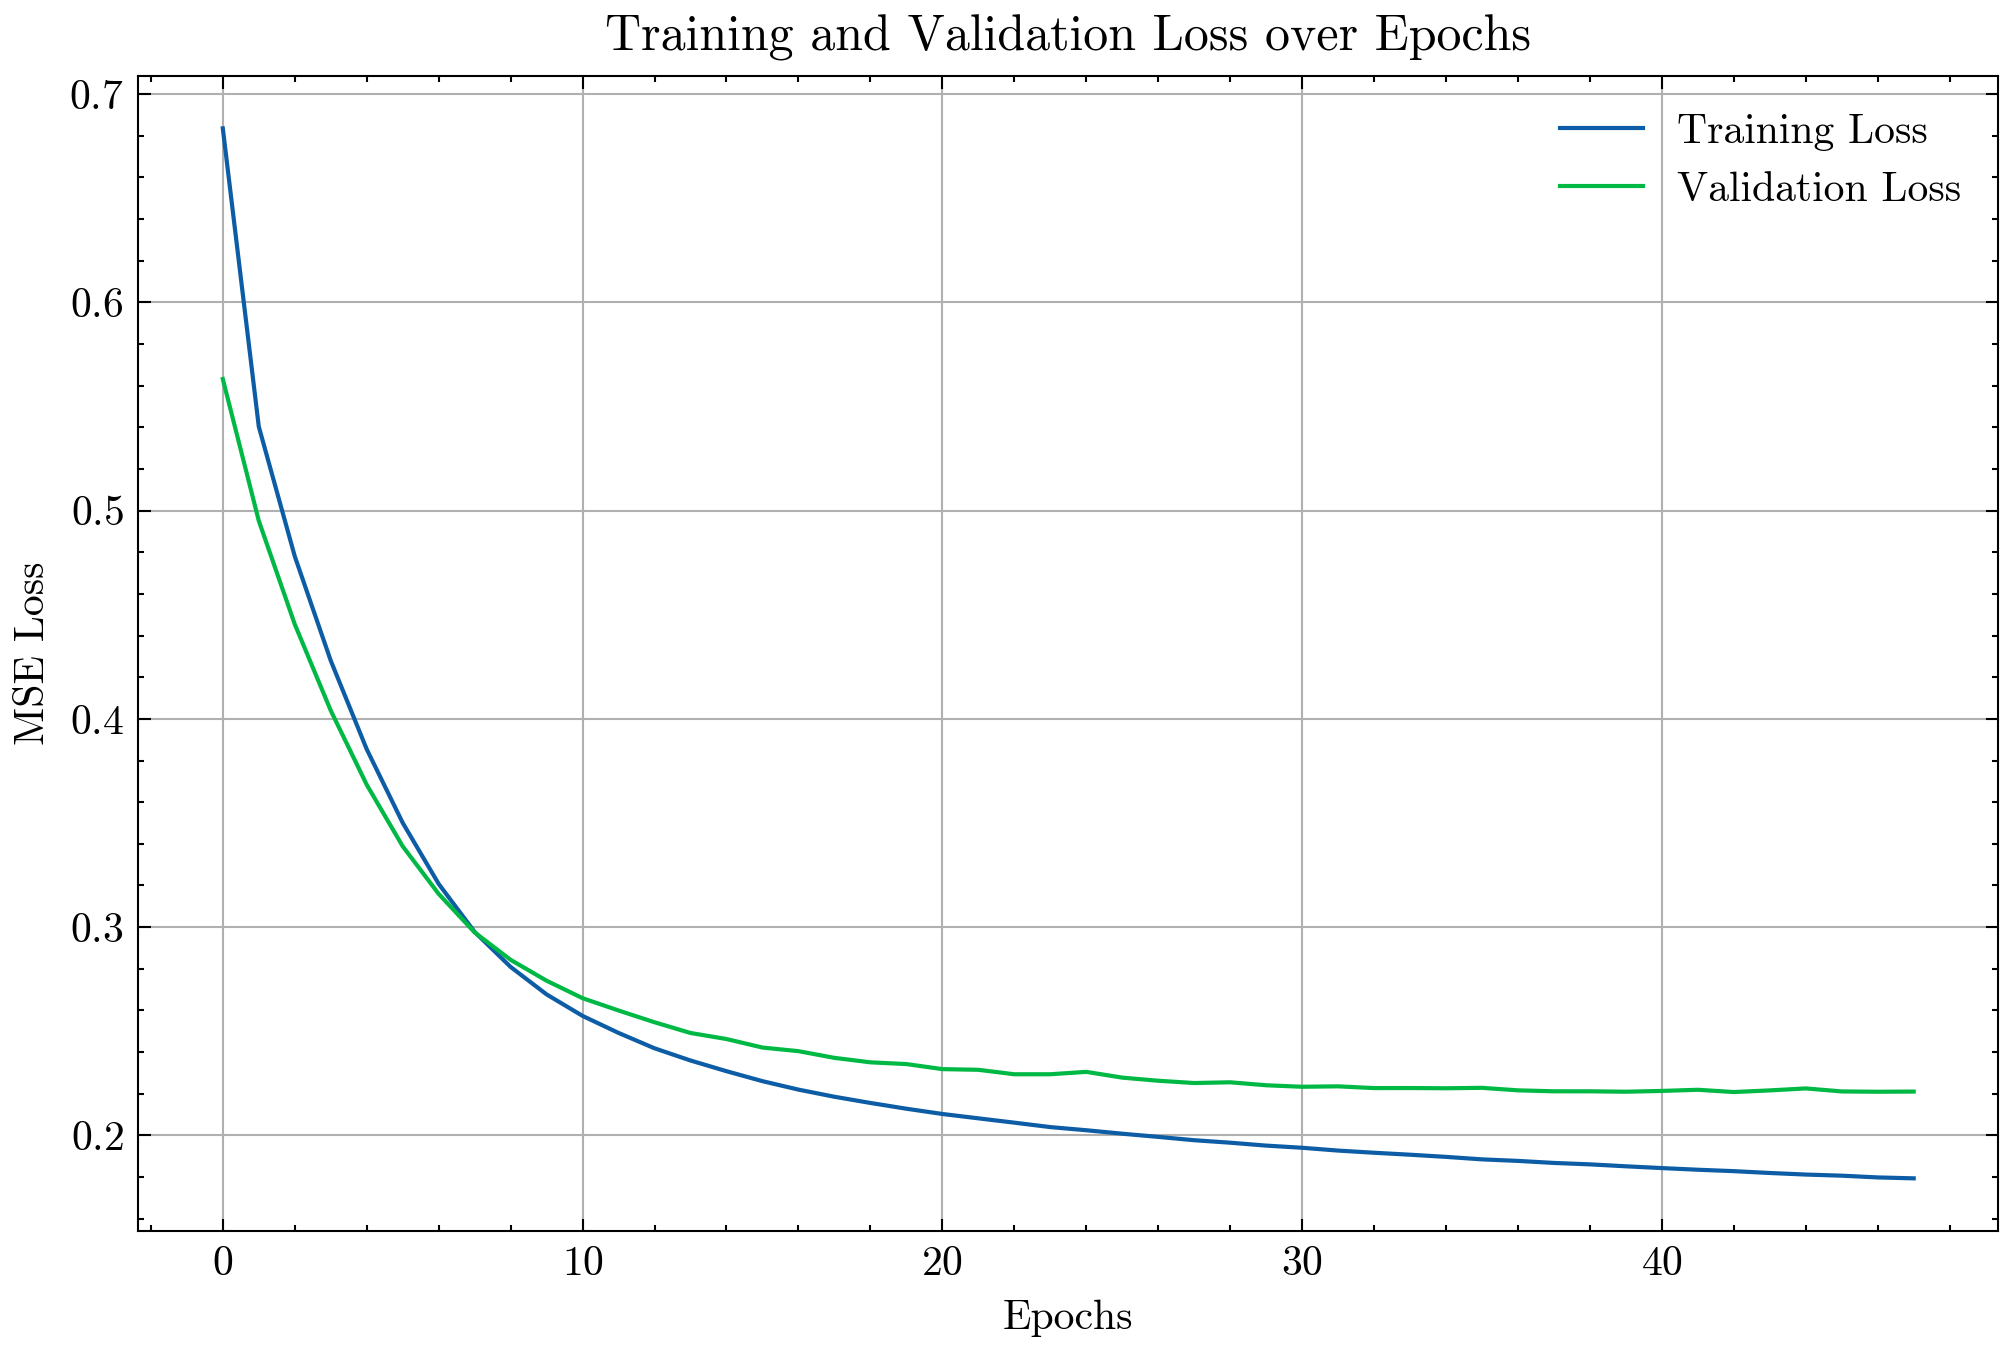

In [9]:
import matplotlib.pyplot as plt
import scienceplots


#loss curves vs epochs
plt.figure(figsize=(8, 5), dpi = 300)
plt.style.use(['science', 'no-latex'])
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
print("Y_test shape:", Y_test.shape)
print("Y_pred shape:", Y_pred_sim.shape)

Y_test shape: (1000, 2)
Y_pred shape: (1000, 2)


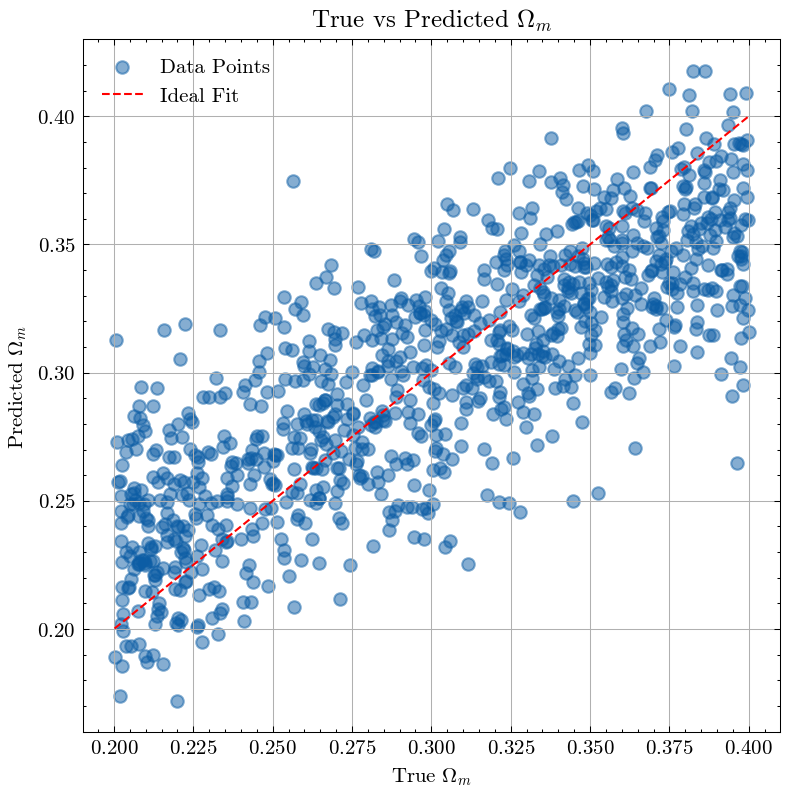

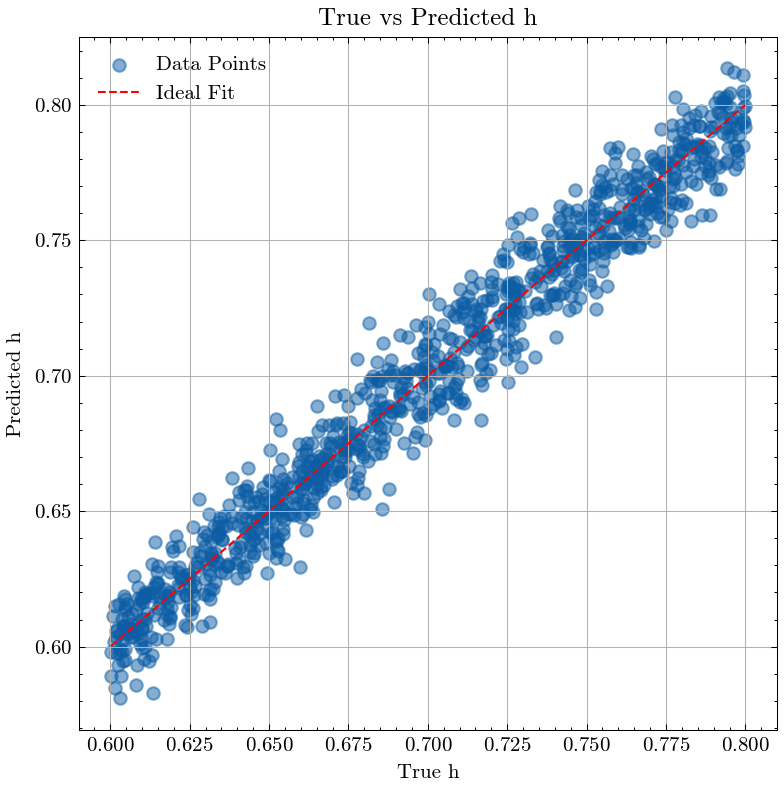

In [14]:
#True vs predicted values

# Scatter plot for Omega_m
plt.figure(figsize=(6, 6), dpi = 150)
plt.style.use(['science', 'no-latex'])
plt.scatter(Y_test[:, 0], Y_pred_sim[:, 0], alpha=0.5, label="Data Points")
plt.plot([Y_test[:, 0].min(), Y_test[:, 0].max()],
         [Y_test[:, 0].min(), Y_test[:, 0].max()], 'r--', label="Ideal Fit")
plt.xlabel('True $\Omega_{m}$')
plt.ylabel('Predicted $\Omega_{m}$')
plt.title('True vs Predicted $\Omega_{m}$')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot for h
plt.figure(figsize=(6, 6), dpi = 150)
plt.style.use(['science', 'no-latex'])
plt.scatter(Y_test[:, 1], Y_pred_sim[:, 1], alpha=0.5, label="Data Points")
plt.plot([Y_test[:, 1].min(), Y_test[:, 1].max()],
         [Y_test[:, 1].min(), Y_test[:, 1].max()], 'r--', label="Ideal Fit")
plt.xlabel('True h')
plt.ylabel('Predicted h')
plt.title('True vs Predicted h')
plt.legend()
plt.grid(True)
plt.show()

#Using this Neural Network on the observational data provided

In [15]:
#loading in the supernova data set
import numpy as np
import pandas as pd

filepath = '/content/drive/MyDrive/Colab Notebooks/Bayesian Stats in Cosmology/Restructured code/LOWZ+ESSENCE+SNLS.csv'
supernova_df = pd.read_csv(filepath)

#defining variables
redshift = supernova_df['Z'].values
distance_mod = supernova_df['MU'].values
err_distance_mod = supernova_df['MUERR']  #can maybe incorporate this into a bayesian neural network??
supernova_df.shape

(151, 15)

Observational vs Simulated data plot

In [18]:
#redhsift grid
target_z = np.linspace(min(redshift),max(redshift),100)

#interpolated the observed distance modulus on the grid
from scipy.interpolate import interp1d

interp_func = interp1d(redshift, distance_mod, kind = 'linear', fill_value = 'extrapolate')
distance_mod_grid = interp_func(target_z)

#reshape to (1,100) so it matched the NN input
X_obs = distance_mod_grid.reshape(1,-1)

#scale with the same scaler
X_obs_scaled = scaler_X.transform(X_obs)

#predict using the trained model
Y_pred_obs_scaled = model.predict(X_obs_scaled)

#inverse the scale
Y_pred_obs = scaler_y.inverse_transform(Y_pred_sim)

#print the values
predicted_omega_m, predicted_h = Y_pred_obs[0]

print(f"Predicted Omega_m (Obs Data): {predicted_omega_m:.4f}")
print(f"Predicted h (Obs Data):       {predicted_h:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Predicted Omega_m (Obs Data): 0.3213
Predicted h (Obs Data):       0.7438


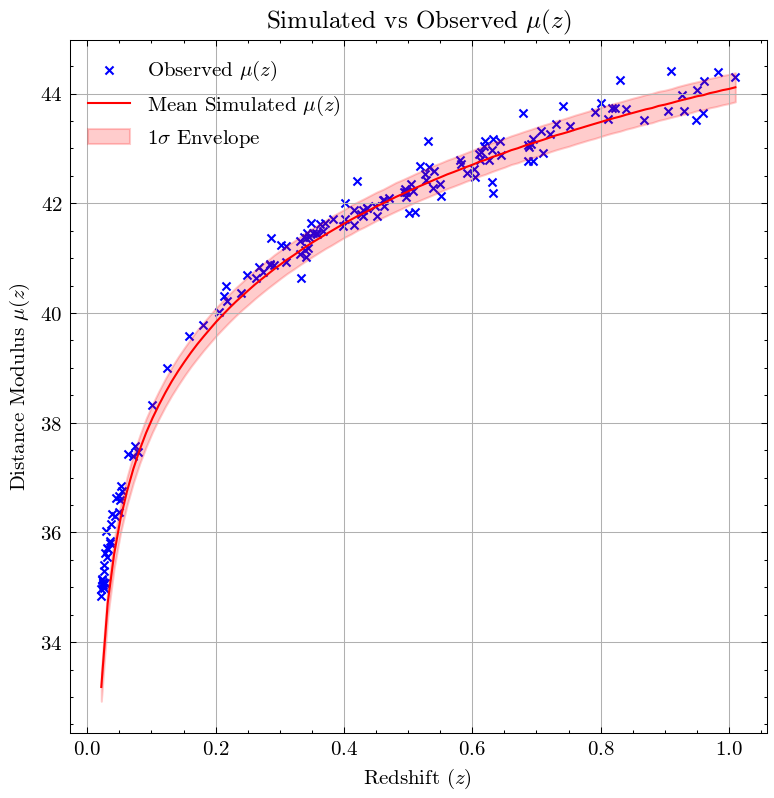

In [50]:
# Plot observed curve
plt.figure(figsize = (6,6), dpi = 150)

#observed data from lowz
plt.scatter(redshift, distance_mod, s=15, marker='x', color='blue',
            label='Observed $\mu(z)$')



#mean and standard deviation (envelope) across all training samples
mean_curve = np.mean(X_train, axis=0)
std_curve = np.std(X_train, axis=0)

#mean simulated data
plt.plot(target_z, mean_curve, color='red', linewidth=1,
         label='Mean Simulated $\mu(z)$')

# Shade the ±1 standard deviation envelope
plt.fill_between(target_z, mean_curve - std_curve, mean_curve + std_curve,
                 color='red', alpha=0.2, label='1$\sigma$ Envelope')

plt.xlabel('Redshift $(z)$ ')
plt.ylabel('Distance Modulus $\mu(z)$')
plt.title('Simulated vs Observed $\mu(z)$')
plt.legend()
plt.grid(True)
plt.show()

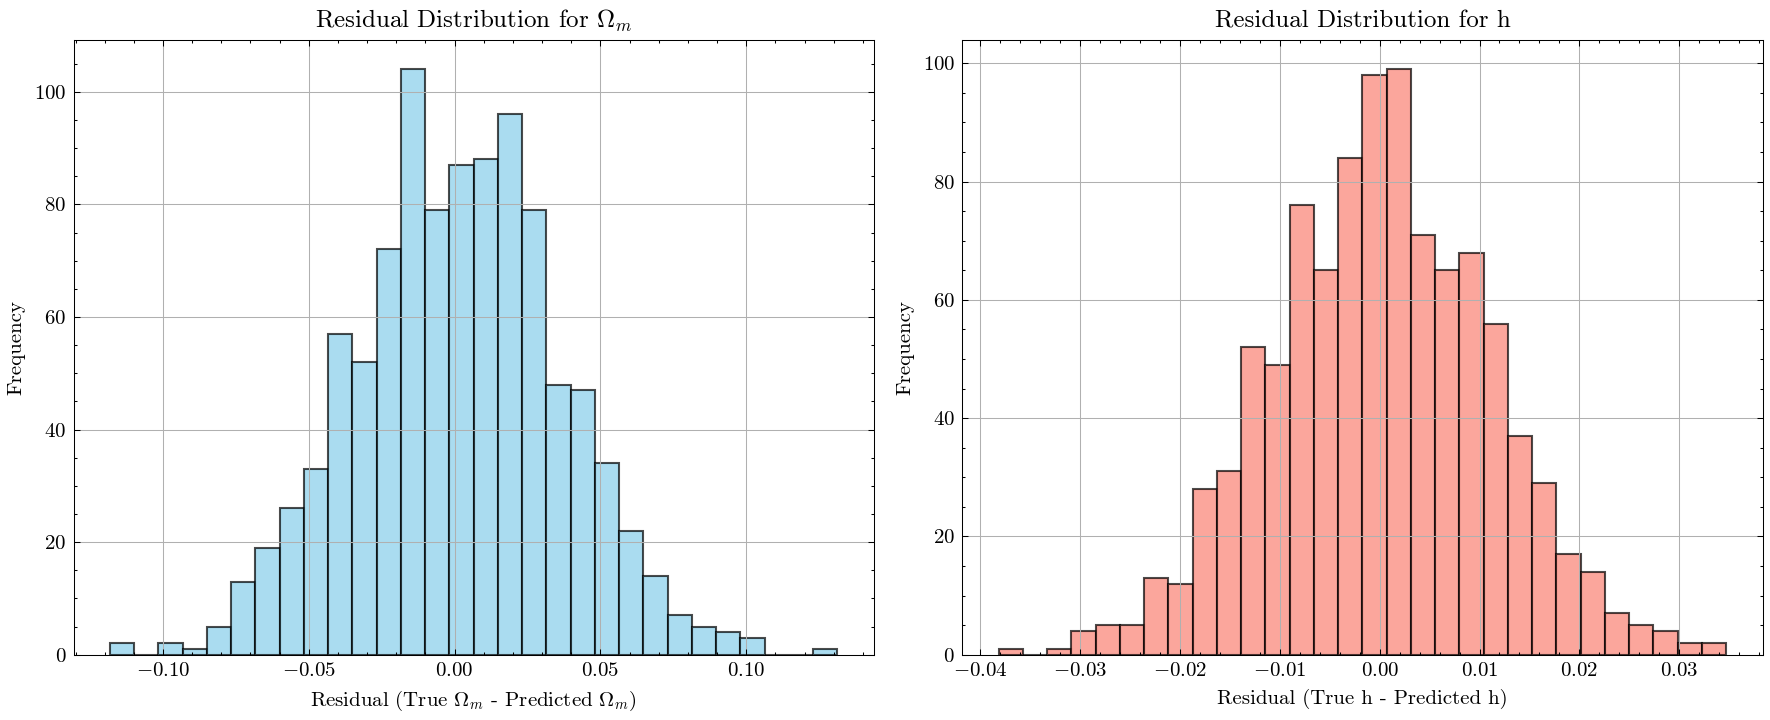

In [53]:
#residuals plot

#calculate residuals: (true - predicted)
residuals_omega = Y_test[:, 0] - Y_pred_sim[:, 0]
residuals_h     = Y_test[:, 1] - Y_pred_sim[:, 1]

plt.figure(figsize=(12, 5), dpi=150)

#residuals for Omega_m
plt.subplot(1, 2, 1)
plt.hist(residuals_omega, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Residual (True $\Omega_m$ - Predicted $\Omega_m$)')
plt.ylabel('Frequency')
plt.title('Residual Distribution for $\Omega_m$')
plt.grid(True)

#residuals for h
plt.subplot(1, 2, 2)
plt.hist(residuals_h, bins=30, alpha=0.7, color='salmon', edgecolor='black')
plt.xlabel('Residual (True h - Predicted h)')
plt.ylabel('Frequency')
plt.title('Residual Distribution for h')
plt.grid(True)

plt.tight_layout()
plt.show()